<a href="https://colab.research.google.com/github/SrivenkateswaraRao/Research-Project/blob/master/28072020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from os import listdir
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import files
files.upload() 

In [25]:
import CreatePestImageData as Imagedataset
import SupportingFunctions as support

In [ ]:
support.DownLoadFiles('1aXb25Wp9sG7mL6AQgYY9ElrGcERi95JU',drive)

In [14]:
support.Unzip('/content/LABELS_V3.0.zip','/content/Pests/Labels')

In [15]:
support.fileCount('/content/Pests/Labels')

4330


In [16]:
dataSet = Imagedataset.createImageDataset()

In [35]:
class_object = {0 : 'egg_wf' ,
                1 : 'egg_bt', 2 : 'egg_ta', 3 : 'wf', 4 : 'bt', 5 : 'tomato'}

In [ ]:
dataSet.prepare_dataset('/content/Pests/Labels' , class_object ,32, '/content/Pests/Images/',  test_size=11241 )

In [ ]:
listdir('/content/Pests/Labels')

In [37]:
(trainY , trainX) , (testY , testX ) = (dataSet.trainY , dataSet.trainX ) , (dataSet.testY , dataSet.testX )


In [38]:
import numpy as np 
np.save('/content/drive/My Drive/Research-Data/testX_Pred',testX) 
np.save('/content/drive/My Drive/Research-Data/testY_Pred', testY)
np.save('/content/drive/My Drive/Research-Data/testX',testX) 
np.save('/content/drive/My Drive/Research-Data/testY', testY)
np.save('/content/drive/My Drive/Research-Data/trainX',trainX) 
np.save('/content/drive/My Drive/Research-Data/trainY', trainY)

In [51]:
testX_Pred = np.load('/content/drive/My Drive/Research-Data/testX_Pred.npy') 
testY_Pred = np.load('/content/drive/My Drive/Research-Data/testY_Pred.npy')

In [53]:
print(testY_Pred)

[0 0 3 ... 1 0 9]


In [33]:
group_list(list(testY))

[(3, 2677), (1, 1983), (4, 1290), (0, 5173), (9, 118)]

In [29]:
from collections import OrderedDict  

def group_list(lst):     
    res =  [(el, lst.count(el)) for el in lst] 
    return list(OrderedDict(res).items()) 
    print(group_list(lst)) 


In [ ]:
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
import tensorflow as tf

Using TensorFlow backend.


In [ ]:
base = VGG19(include_top=False, input_shape=(224, 224, 3))

In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=[224,224,3], include_top=False)
pretrained_model.trainable = False

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])
# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten_1 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                627210    
Total params: 2,885,194
Trainable params: 627,210
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [43]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(101169, 32, 32, 3)
(101169, 10)
(11241, 32, 32, 3)
(11241, 10)


In [ ]:
from tensorflow.keras.utils import to_categorical
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [41]:
filepath="/content/drive/My Drive/Models/VGG16/weights-{epoch:02d}-{accuracy:.3f}.hdf5"
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath, monitor='accuracy',
                               verbose=1, mode='max',save_best_only=True)

callbacks_list = [checkpoint]

In [ ]:
tf.config.experimental_run_functions_eagerly(True)


In [ ]:
history = model.fit(trainX,trainY,verbose=1,epochs=20,validation_data=(testX,testY),callbacks=[checkpoint])

Epoch 1/20
1406/1406 [==============================] - ETA: 0s - loss: 5.9027 - accuracy: 0.6221
Epoch 00001: accuracy improved from -inf to 0.62212, saving model to /content/drive/My Drive/Models/MobileNetV2/weights-01-0.622.hdf5
1406/1406 [==============================] - 1543s 1s/step - loss: 5.9027 - accuracy: 0.6221 - val_loss: 5.8583 - val_accuracy: 0.6261
Epoch 2/20
1406/1406 [==============================] - ETA: 0s - loss: 5.9251 - accuracy: 0.6233
Epoch 00002: accuracy improved from 0.62212 to 0.62330, saving model to /content/drive/My Drive/Models/MobileNetV2/weights-02-0.623.hdf5
1406/1406 [==============================] - 1525s 1s/step - loss: 5.9251 - accuracy: 0.6233 - val_loss: 5.9808 - val_accuracy: 0.6166
Epoch 3/20
 181/1406 [==>...........................] - ETA: 20:10 - loss: 6.1759 - accuracy: 0.6112

In [39]:
from tensorflow.keras.utils import to_categorical
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [42]:
from keras.models import load_model
model = load_model("/content/drive/My Drive/Models/VGG16/weights-49-0.805.hdf5")
model.fit(trainX,trainY,verbose=1,epochs=1,validation_data=(testX,testY),callbacks=[checkpoint])


Train on 101169 samples, validate on 11241 samples
Epoch 1/1
101169/101169 [==============================] - 126s 1ms/step - loss: 0.5699 - accuracy: 0.7721 - val_loss: 0.5758 - val_accuracy: 0.7662

Epoch 00001: accuracy improved from -inf to 0.77208, saving model to /content/drive/My Drive/Models/VGG16/weights-01-0.772.hdf5


In [46]:
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
   
  plt.imshow(img[...,0], cmap=plt.cm.binary)
 
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
   
  plt.xlabel("{} {:2.0f}% ({})".format(class_object[predicted_label],
                                100*np.max(predictions_array),
                                class_object[true_label]),
                                color=color)

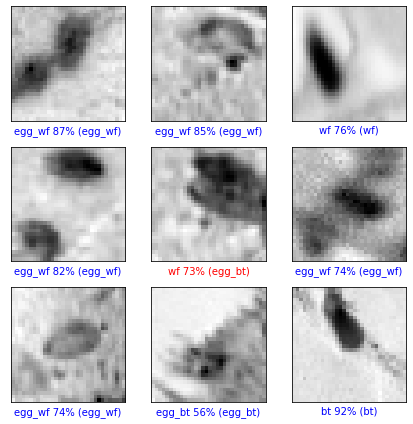

In [54]:
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
test_images = testX[:num_images]
predictions = model.predict(testX_Pred)
for i in range(num_images):    
    plt.subplot(num_rows, num_cols, i+1)   
    plot_image(i, predictions, testY_Pred, testX_Pred)    
 
plt.tight_layout()
plt.show()